# Trying to simulate a particle moving with constant velocity
I will append each step to some dataset and figure out a way to display it with matplotlib

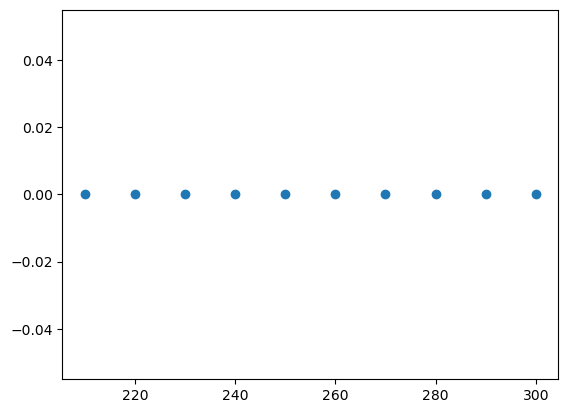

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Initial conditions
position = np.array([300, 0])
velocity = np.array([-10, 0])

## Simulating parameters
starttime = 0
dt = 1
totaltime = 10

simulation = np.array([position + velocity*d for d in range(starttime, totaltime, dt)])

plt.scatter(np.transpose(simulation)[0], np.transpose(simulation)[1])
plt.show()


# Trying to add accelleration

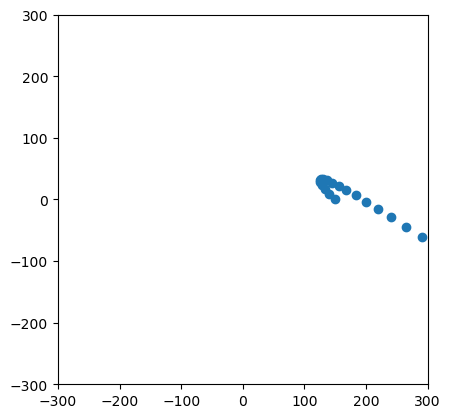

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Initial conditions
position     = np.array([150, 0])
velocity     = np.array([-10, 10])
acceleration = np.array([2, -1.5])

## Simulating parameters
starttime = 0
dt = 1
endtime = 20
totaltime = endtime - starttime

simulation = np.array([position + velocity*d + 0.5*acceleration*d**2 for d in np.linspace(starttime, totaltime, int(totaltime//dt))])


fig, ax = plt.subplots()
ax.scatter(np.transpose(simulation)[0], np.transpose(simulation)[1])
ax.set_aspect('equal')
ax.set_ylim((-300, 300))
ax.set_xlim((-300, 300))
plt.show()

### How to make another particle interact?

-0.7411111111111112
-0.7429453277369157
-0.7466388303069835
-0.7522425893915609
-0.7598351916439215
-0.7695255444667848
-0.7814567441648321
-0.7958113660169899
-0.8128185476789352
-0.8327633932282694
-0.8559994462018938
-0.8829653005596808
-0.9142068932409557
-0.9504077395006231
-0.9924304798559144


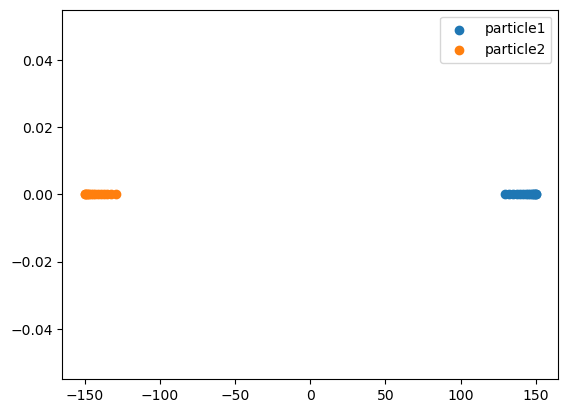

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Initial conditions
class particle(object):
    def __init__(self, xpos, ypos, xvel, yvel, xacc, yacc, mass):
        self.xpos = xpos
        self.ypos = ypos
        self.xvel = xvel
        self.yvel = yvel
        self.xacc = xacc
        self.yacc = yacc
        self.mass = mass

one = particle(150, 0, 0, 0, 0, 0, 100)
two = particle(-150, 0, 0, 0, 0, 0, 100)

## Simulation parameters
start = 0
stop = 15
totaltime = stop - start
dt = 1
gravconst = 6.67

# Simulaiton routine
simulation1, simulation2 = [], []
for i in np.linspace(start, stop, int(totaltime//dt)):
    simulation1.append([one.xpos, one.ypos])
    simulation2.append([two.xpos, two.ypos])
    distancevec = [one.xpos - two.xpos, one.ypos - two.ypos]
    distancemag = np.sqrt(distancevec[0]**2 + distancevec[1]**2)
    gravforce = gravconst*one.mass*two.mass/distancemag**2
    one.xacc = -gravforce/distancemag*(distancevec[0])
    print(one.xacc)
    #one.yacc = gravforce/distancemag*(distancevec[1])
    two.xacc = -one.xacc
    #two.yacc = -one.yacc
    one.xvel += 0.5*one.xacc*dt**2
    #one.yvel += 0.5*one.yacc*dt**2
    two.xvel += 0.5*two.xacc*dt**2
    #two.yvel += 0.5*two.yacc*dt**2
    one.xpos += 0.5*one.xvel*dt**2
    #one.ypos += 0.5*one.yvel*dt**2
    two.xpos += 0.5*two.xvel*dt**2
    #two.ypos += 0.5*two.yvel*dt**2
    



simulation1 = np.array(simulation1).astype(float)
simulation2 = np.array(simulation2).astype(float)

fig, ax = plt.subplots()
ax.scatter(np.transpose(simulation1)[0], np.transpose(simulation1)[1], label='particle1')
ax.scatter(np.transpose(simulation2)[0], np.transpose(simulation2)[1], label='particle2')
#ax.set_aspect('equal')
#ax.set_ylim((-300, 300))
#ax.set_xlim((-300, 300))
ax.legend()
plt.show()